In [1]:
# Library Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Setup and Load Data

from pathlib import Path

cwd = Path.cwd()
BASE_DIR = cwd.parent

MODELS_DIR = BASE_DIR / "models"
DATA_PROCESSED_DIR = BASE_DIR / "data" / "processed"
REPORTS_DIR = BASE_DIR / "reports"
FIGURES_DIR = REPORTS_DIR / "figures"

DATA_PROCESSED_DIR, REPORTS_DIR, FIGURES_DIR

train_path = DATA_PROCESSED_DIR / "panel_country_split_train.csv"
test_path = DATA_PROCESSED_DIR / "panel_country_split_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train Shape:", train_df.shape)
print("Test Shape :", test_df.shape)
train_df.head()

Train Shape: (9917, 6)
Test Shape : (2532, 6)


,Country,Year,fertility,migration,urban_pop,flfp
0,Afghanistan,2006,6.686,57673.0,22.907,41.241034
1,Afghanistan,1974,7.526,-20009.0,13.219,6.830000
2,Afghanistan,1981,7.617,-1998086.0,16.562,9.378966
3,Afghanistan,1993,7.761,1149684.0,21.444,24.672759
4,Afghanistan,1991,7.631,32782.0,21.266,22.123793


In [3]:
# X & Y Split

target_col = "fertility"

X_train = train_df.drop(columns=[target_col, "Country"])  
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col, "Country"])
y_test = test_df[target_col]

In [4]:
# Random Forest Model

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

rf

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
# Train the Model

rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
# Get Predictions

y_pred = rf.predict(X_test)

print("First 10 Predictions:", y_pred[:10])
print("First 10 True Values:", y_test.values[:10])

First 10 Predictions: [4.06249333 4.97155333 6.19968333 3.68886    7.44842    5.99862
 5.59165667 6.23436667 7.47468    5.61696   ]
First 10 True Values: [7.018 7.641 7.767 6.295 7.553 7.757 5.985 7.174 7.561 5.879]


In [7]:
# Performance Metrics

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MAE : {mae:.4f}")
print(f"Random Forest - RMSE: {rmse:.4f}")
print(f"Random Forest - R²  : {r2:.44f}")

Random Forest - MAE : 0.4398
Random Forest - RMSE: 0.6674
Random Forest - R²  : 0.89353387737487455222407106703030876815319061


In [8]:
# Results DataFrame

results_rf = pd.DataFrame({
    "model": ["RandomForestRegressor"],
    "MAE": [mae],
    "RMSE": [rmse],
    "R2": [r2]
})

results_rf

,model,MAE,RMSE,R2
0,RandomForestRegressor,0.43985,0.667382,0.893534


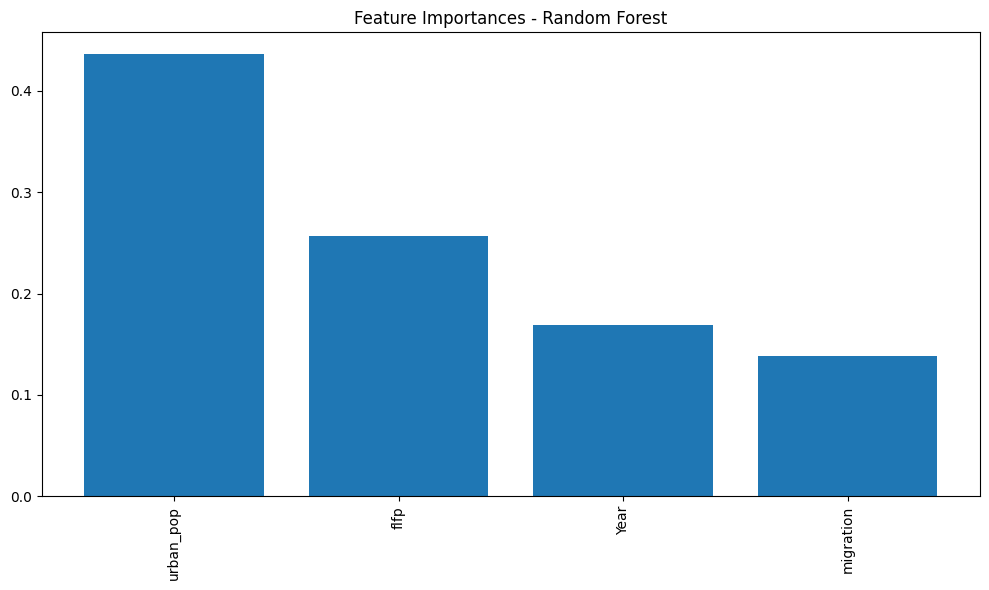

Saved to: d:\DS-Project\Demographic-Change_Understanding-Fertility-Through-Data\reports\figures\feature_importances_random_forest.png


In [9]:
# Feature Importance Graphic

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()

# Save Figure
save_path = FIGURES_DIR / "feature_importances_random_forest.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

print(f"Saved to: {save_path}")

In [10]:
# Save Model Results

import joblib

MODELS_DIR.mkdir(parents=True, exist_ok=True)

model_path = MODELS_DIR / "random_forest_fertility.pkl"
joblib.dump(rf, model_path)

print(f"Model Saved to: {model_path}")

Model Saved to: d:\DS-Project\Demographic-Change_Understanding-Fertility-Through-Data\models\random_forest_fertility.pkl
